In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from src import gm

AttributeError: 'gm3s' object has no attribute 'F'

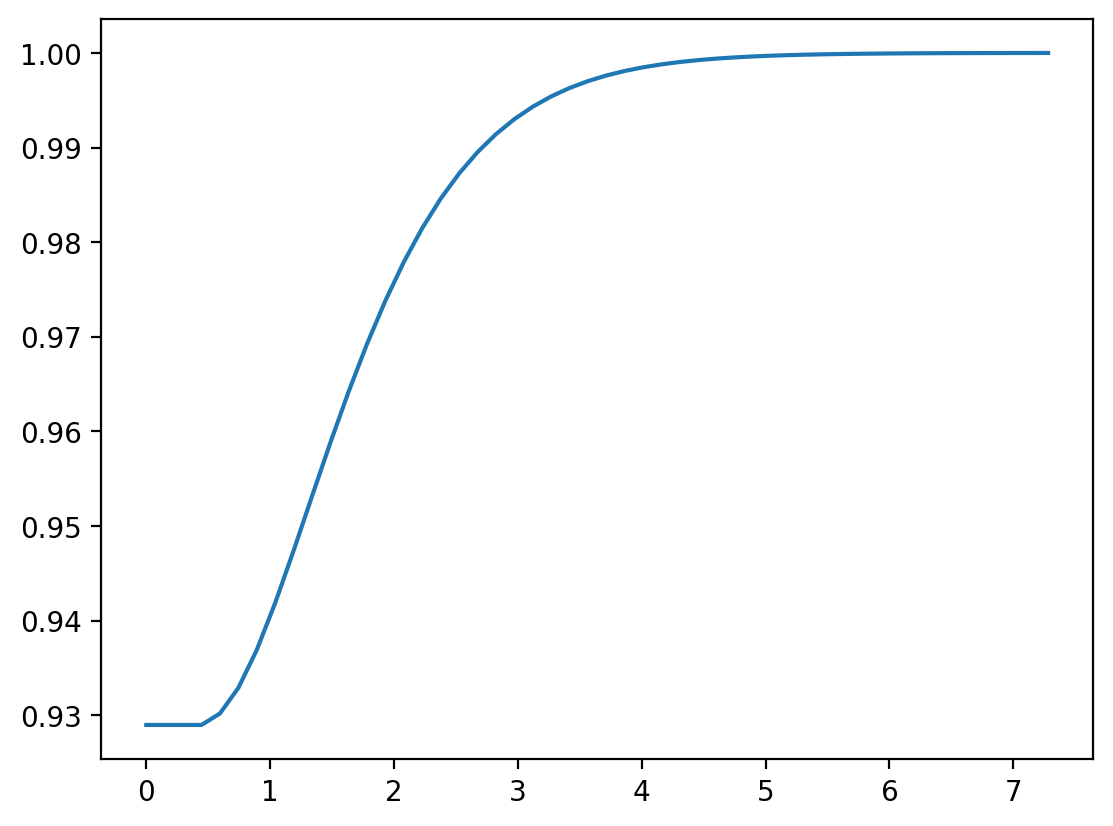

In [2]:
# %% Fig. 7

params_3s = dict(
    Atot=8000,
    W=1,
    L=8000,
    H=44,
    tau=6.73,
    dzdx=0.4,
    ts=np.arange(0, 50, 1),
    bt=0,
    b_p=np.concatenate([
        np.tile(0, 1), np.tile(0.5, 49)
    ]),
)

years = 100
dt = 1

m3s = gm.gm3s(**params_3s).run()

t = m3s.ts / m3s.tau
fig, ax = plt.subplots(dpi=200)
ax.plot(t, m3s.L / m3s.L.max(), label='length')
ax.plot(t, m3s.F / m3s.F.max(), label='flux')
ax.plot(t, m3s.h / m3s.h.max(), label='height')
ax.legend()

In [ ]:
# Fig. 8b
t = np.arange(0, 40, 1)
acf = m3s.acf(t=t)
fig, ax = plt.subplots()
ax.plot(t, acf, label='ACF')

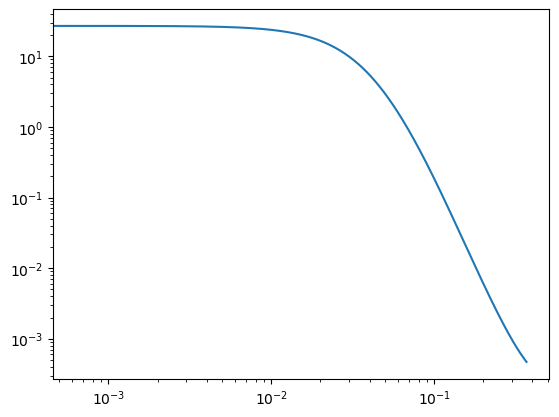

In [3]:
# Fig. 8c
freq = np.arange(0, 1 / np.e, 2 * np.pi / 10000)
spectrum = m3s.power_spectrum(freq=freq, sig_L_1s=1)
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(freq, spectrum, label='power spectrum')

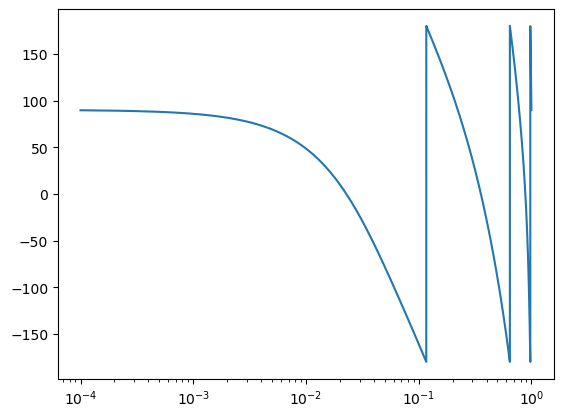

In [4]:
# Fig. 8d
freq = np.linspace(1/1e4, 1, int(1e4))
phase = m3s.phase(freq=freq)
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.plot(freq, phase, label='phase')

/var/folders/bb/wssqxcxj4tgg0s9fdw74731m0000gn/T/ipykernel_30570/1759749533.py:47: RuntimeWarning: invalid value encountered in divide
  ax[2].plot(m1s.ts, m1s.Lp/m1s.Lp_eq, label='1s $f_{eq}$', c='tab:blue')
/var/folders/bb/wssqxcxj4tgg0s9fdw74731m0000gn/T/ipykernel_30570/1759749533.py:48: RuntimeWarning: invalid value encountered in divide
  ax[2].plot(m3s.ts, m3s.Lp/m3s.Lp_eq, label='3s $f_{eq}$', c='tab:orange')


(0.0, 2.0)

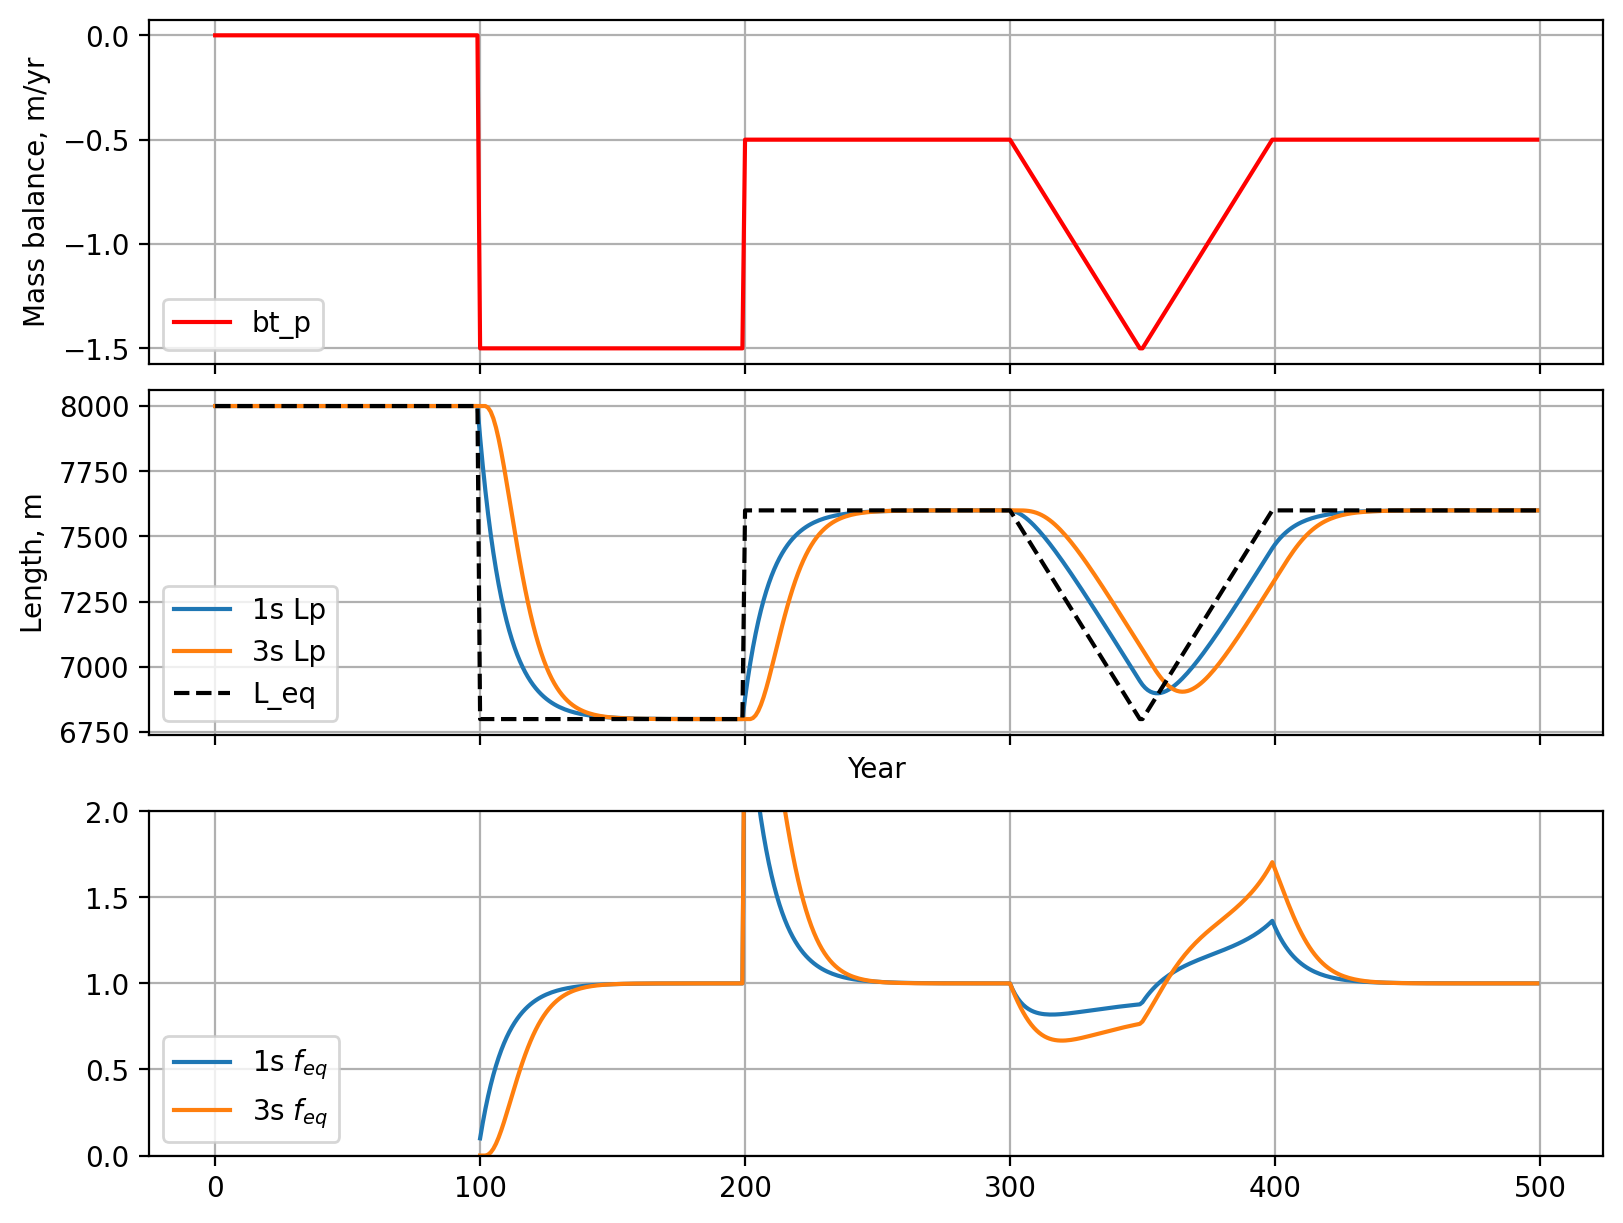

In [5]:
b_p = np.concatenate([
    np.tile(0, 100),
    np.tile(-1.5, 100),
    np.tile(-0.5, 100),
    np.linspace(-0.5, -1.5, 50),
    np.linspace(-1.5, -0.5, 50),
    np.tile(-0.5, 100),
])

L0 = 8000
params_1s = dict(
    L=L0,
    H=100,
    bt=0,
    tau=10,
    ts=np.arange(0, len(b_p), 1),
    bp=b_p,
)
params_3s = dict(
    Atot=8000,
    W=1,
    L=L0,
    H=100,
    bt=0,
    tau=10,
    b_p=b_p,
    ts=np.arange(0, len(b_p), 1),
    
)
m1s = gm.gm1s(**params_1s).run()
m3s = gm.gm3s(**params_3s).run()

#print(m3s.L_p)
#print(m3s.bt)
#print(m3s.F)
#print(m3s.L)


fig, ax = plt.subplots(3,1, figsize=(8,6), dpi=200, layout='constrained', sharex=True)
ax[0].plot(m1s.ts, m1s.btp, label='bt_p', c='red')

ax[1].plot(m1s.ts, m1s.L_bar + m1s.Lp, label='1s Lp', c='tab:blue')
ax[1].plot(m3s.ts, m3s.L_bar + m3s.Lp, label='3s Lp', c='tab:orange')
ax[1].plot(m1s.ts, m1s.L_bar + m1s.Lp_eq, label='L_eq', color='black', ls='--')


ax[2].plot(m1s.ts, m1s.Lp/m1s.Lp_eq, label='1s $f_{eq}$', c='tab:blue')
ax[2].plot(m3s.ts, m3s.Lp/m3s.Lp_eq, label='3s $f_{eq}$', c='tab:orange')
#ax[2].plot(m3s.ts, (m3s.Lp_eq - m1s.Lp)/(m3s.Lp), label='3s $f_eq$', c='tab:orange')

for axis in ax.ravel():
    axis.grid(which='both', axis='both')
    axis.legend(loc='lower left')
ax[0].set_ylabel('Mass balance, m/yr')
ax[1].set_ylabel('Length, m')
ax[1].set_xlabel('Year')
ax[2].set_ylim(0, 2)

/var/folders/bb/wssqxcxj4tgg0s9fdw74731m0000gn/T/ipykernel_30570/2666077980.py:60: RuntimeWarning: invalid value encountered in divide
  ax[3].plot(tau2.ts / tau2.tau, tau2.Lp / tau2.Lp_eq, label='2*tau L_p', color='blue')
/var/folders/bb/wssqxcxj4tgg0s9fdw74731m0000gn/T/ipykernel_30570/2666077980.py:61: RuntimeWarning: invalid value encountered in divide
  ax[3].plot(tau6.ts / tau6.tau, tau6.Lp / tau6.Lp_eq, label='6*tau L_p', color='red')
/var/folders/bb/wssqxcxj4tgg0s9fdw74731m0000gn/T/ipykernel_30570/2666077980.py:62: RuntimeWarning: invalid value encountered in divide
  ax[3].plot(tau50.ts / tau50.tau, tau50.Lp / tau50.Lp_eq, label='50*tau L_p', color='orange')


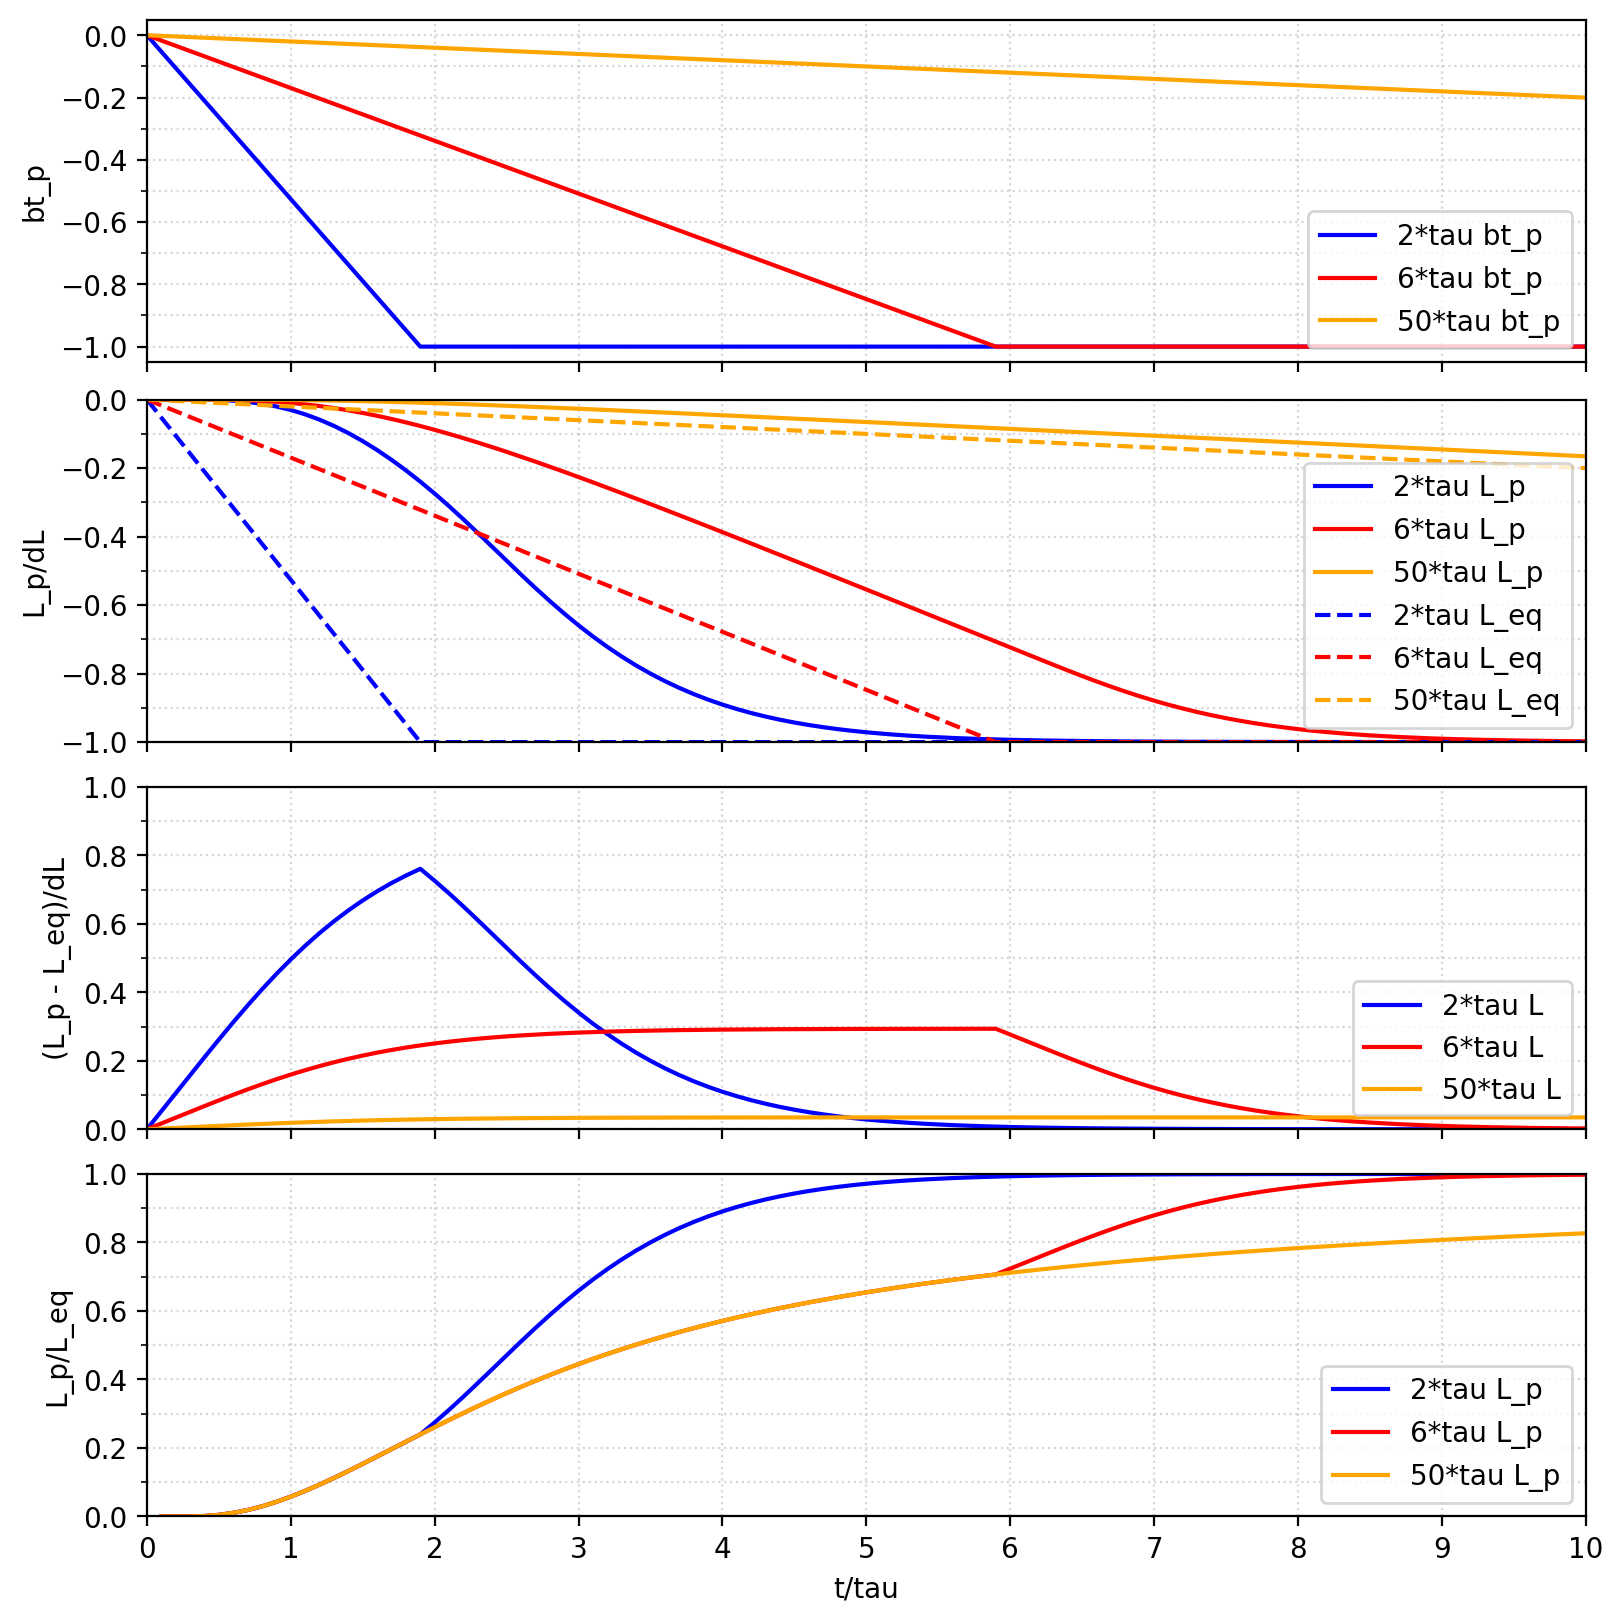

In [10]:
params_3s = dict(
    Atot=8000,
    W=1,
    L=8000,
    H=100,
    bt=0,
    tau=10,
    ts=np.arange(0, 550, 1),
)
b_p = np.concatenate([
    np.linspace(0, -1, 20),
    np.tile(-1, 530),
])
tau2 = gm.gm3s(b_p=b_p, **params_3s).run()

b_p = np.concatenate([
    np.linspace(0, -1, 60),
    np.tile(-1, 490),
])
tau6 = gm.gm3s(b_p=b_p, **params_3s).run()


b_p = np.concatenate([
    np.linspace(0, -1, 500),
    np.tile(-1, 50),
])
tau50 = gm.gm3s(b_p=b_p, **params_3s).run()
# print(m3s.L_p)
# print(m3s.bt)
# print(m3s.F)
# print(m3s.L)

fig, ax = plt.subplots(4, 1, figsize=(8, 8), dpi=200, layout='constrained', sharex=True)
[axis.set_xlim((0, 10)) for axis in ax]
[axis.xaxis.set_major_locator(mpl.ticker.MultipleLocator(1)) for axis in ax]
[axis.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.2)) for axis in ax]
[axis.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.1)) for axis in ax]

ax[0].plot(tau2.ts/tau2.tau, tau2.bt_p, label='2*tau bt_p', color='blue')
ax[0].plot(tau6.ts/tau2.tau, tau6.bt_p, label='6*tau bt_p', color='red')
ax[0].plot(tau50.ts/tau2.tau, tau50.bt_p, label='50*tau bt_p', color='orange')
ax[0].set_ylabel('bt_p')

ax[1].plot(tau2.ts / tau2.tau, tau2.Lp / tau2.dL, label='2*tau L_p', color='blue')
ax[1].plot(tau6.ts / tau2.tau, tau6.Lp / tau6.dL, label='6*tau L_p', color='red')
ax[1].plot(tau50.ts / tau2.tau, tau50.Lp / tau50.dL, label='50*tau L_p', color='orange')
ax[1].plot(tau2.ts / tau2.tau, tau2.Lp_eq / tau2.dL, label='2*tau L_eq', color='blue', ls='dashed')
ax[1].plot(tau6.ts / tau2.tau, tau6.Lp_eq / tau6.dL, label='6*tau L_eq', color='red', ls='dashed')
ax[1].plot(tau50.ts / tau2.tau, tau50.Lp_eq / tau50.dL, label='50*tau L_eq', color='orange', ls='dashed')
ax[1].set_ylim((-1, 0))
ax[1].set_ylabel('L_p/dL')


ax[2].plot(tau2.ts / tau2.tau, (tau2.Lp - tau2.Lp_eq) / tau2.dL, label='2*tau L', color='blue')
ax[2].plot(tau6.ts / tau6.tau, (tau6.Lp - tau6.Lp_eq) / tau6.dL, label='6*tau L', color='red')
ax[2].plot(tau50.ts / tau50.tau, (tau50.Lp - tau50.Lp_eq) / tau50.dL, label='50*tau L', color='orange')
ax[2].set_ylim((0, 1))
ax[2].set_ylabel('(L_p - L_eq)/dL')

ax[3].plot(tau2.ts / tau2.tau, tau2.Lp / tau2.Lp_eq, label='2*tau L_p', color='blue')
ax[3].plot(tau6.ts / tau6.tau, tau6.Lp / tau6.Lp_eq, label='6*tau L_p', color='red')
ax[3].plot(tau50.ts / tau50.tau, tau50.Lp / tau50.Lp_eq, label='50*tau L_p', color='orange')

ax[3].set_ylim((0, 1))
ax[3].set_ylabel('L_p/L_eq')

ax[3].set_xlabel('t/tau')

for axis in ax.ravel():
    axis.legend(loc='lower right')
    axis.grid(which='both', axis='both', ls=':', alpha=0.5)
